# Taller 01

## Isaac Gonzalez 

---

### Ejericio 1

La sumatoria $1 + 1/2 + 1/4 +1/8 ... $ tal que el error absoluto $e_{abs} < 10^{-1}$.

In [1]:
error = 10**-1
suma = 0
n = 0
while abs(2 - suma) > error:
    suma += 1/(2**n)
    n += 1
print(n)

5


### Ejercicio 2 (Bubble sort)

![XSDF](.\sort.png)

## Modifique el Algoritmo 
Determine el número de comparaciones realizadas al ordenar la serie 5, 4, 3, 2, 1


In [2]:
def bubble_sort(a):
    n = len(a)
    print("i | Vector")
    print("--|----------------")
    cont = 0
    for i in range(n):
        swapped = False
        for j in range(1, n - i):
            if a[j] < a[j - 1]:
                
                a[j], a[j - 1] = a[j - 1], a[j]
                swapped = True
                cont += 1
        print(f"{i} | {a}")
        print(f"Intercambios en esta pasada: {cont}")

        if not swapped:
            break
    return a

#Prueba de escritorio
v1 = [3, 2, 5, 8, 4, 1]
print("Vector original:", v1)
v_sorted = bubble_sort(v1.copy())
print("Resultado ordenado:", v_sorted)

#Caso de prueba
v2 = [ -1, 0, 4, 5, 6, 7]
v3 = [5, 4, 3, 2, 1]
print("\n Caso 2 :",  bubble_sort(v2.copy()))
print("\n Caso 3 :", bubble_sort(v3.copy()))
import random
#v3 = [random.randint(-200, 145) for _ in range(100000)]
#print("\n Caso 3 (random) :", bubble_sort(v3.copy()))
      

Vector original: [3, 2, 5, 8, 4, 1]
i | Vector
--|----------------
0 | [2, 3, 5, 4, 1, 8]
Intercambios en esta pasada: 3
1 | [2, 3, 4, 1, 5, 8]
Intercambios en esta pasada: 5
2 | [2, 3, 1, 4, 5, 8]
Intercambios en esta pasada: 6
3 | [2, 1, 3, 4, 5, 8]
Intercambios en esta pasada: 7
4 | [1, 2, 3, 4, 5, 8]
Intercambios en esta pasada: 8
5 | [1, 2, 3, 4, 5, 8]
Intercambios en esta pasada: 8
Resultado ordenado: [1, 2, 3, 4, 5, 8]
i | Vector
--|----------------
0 | [-1, 0, 4, 5, 6, 7]
Intercambios en esta pasada: 0

 Caso 2 : [-1, 0, 4, 5, 6, 7]
i | Vector
--|----------------
0 | [4, 3, 2, 1, 5]
Intercambios en esta pasada: 4
1 | [3, 2, 1, 4, 5]
Intercambios en esta pasada: 7
2 | [2, 1, 3, 4, 5]
Intercambios en esta pasada: 9
3 | [1, 2, 3, 4, 5]
Intercambios en esta pasada: 10
4 | [1, 2, 3, 4, 5]
Intercambios en esta pasada: 10

 Caso 3 : [1, 2, 3, 4, 5]


# Algoritmo 3

![XSDF](.\fibo.png)

In [6]:
#fibonacci
def fibonacci(n):
    if n == 0:
        return 0
    x,y = 0,1
    for i in range(1, n):
        z = x + y
        x, y = y, z
    return y

#Prueba de escritorio

print("Fibonacci 11 : ", fibonacci(11))
print("Fibonacci 84 : ", fibonacci(84))
print("Fibonacci 1531 : ", fibonacci(1531))


Fibonacci 11 :  89
Fibonacci 84 :  160500643816367088
Fibonacci 1531 :  40793617605237766910177891101532305954169356679469251968012246320785442201399010062608120133898796842159214701491227645296640251351118097414452512943377923944240851901342511998321837317687231200181404989351498771613091128609066442842273029931595972451439617557382711759593384278734694858010024767646023157013418593547269


### Gráfica del numero Aureo

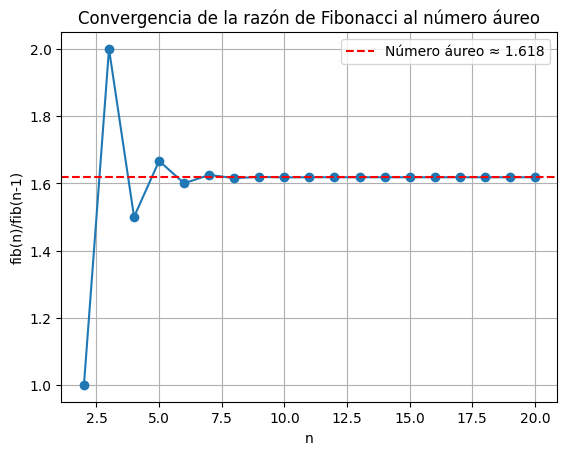

In [7]:
#Grafica de la serie de Fibonacci
import matplotlib.pyplot as plt

def fib_iterative(n):
    if n == 0:
        return 0
    x, y = 0, 1
    for i in range(1, n):
        z = x + y
        x, y = y, z
    return y

# Calcular serie y cocientes
N = 20
fibs = [fib_iterative(i) for i in range(1, N + 1)]
ratios = [fibs[i] / fibs[i - 1] for i in range(1, len(fibs))]

# Graficar
plt.plot(range(2, N + 1), ratios, marker='o')
plt.axhline(y=(1 + 5**0.5)/2, color='r', linestyle='--', label='Número áureo ≈ 1.618')
plt.xlabel('n')
plt.ylabel('fib(n)/fib(n-1)')
plt.title('Convergencia de la razón de Fibonacci al número áureo')
plt.legend()
plt.grid(True)
plt.show()

### Extra: 
Usando el Algoritmo 03 y la aritmética de redondeo con 3 cifras, determine la iteración desde la cual el error relativo de $\frac{y_{i+1}}{y_i} ( i > 0)$ con respecto a $\frac{1 + \sqrt{5}}{2}$ está dentro de $10^{-5}$

In [6]:
def fibonacci_redondeado(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        x, y = 0, 1
        for i in range(2, n + 1):
            z = x + y  # sin redondeo dentro del cálculo
            x, y = y, z
        return y


phi = (1 + 5**0.5) / 2      # número áureo
tolerancia = 1e-5            # 10^-5
i = 1                        # empezamos desde i=1

while True:
    y_i = fibonacci_redondeado(i)
    y_next = fibonacci_redondeado(i + 1)

    if y_i == 0:
        i += 1
        continue

    razon = round(y_next / y_i, 3)           
    razon_real = y_next / y_i                
    error_rel = abs((razon_real - phi) / phi)     

    if error_rel < tolerancia:
        break

    i += 1
print(f"Iteración donde el error relativo está dentro de la tolerancia ({tolerancia}): {i}")





Iteración donde el error relativo está dentro de la tolerancia (1e-05): 13


# Algoritmo 04

Implemente la serie geométrica 

$\sum_{n=1}^{\infty} \frac{1}{n}$

A qué válor converge el algoritmo 04?


In [9]:
suma = 1
for i in range(1, 20):
    suma += 1/i
print(suma)





4.547739657143681
